In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df = pd.read_csv(r'weatherHistory.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
df.shape

(96453, 12)

In [4]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [5]:
df.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [6]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)

In [7]:
df = df.set_index('Formatted Date')
df.head(3)

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.


In [8]:
df.dtypes

Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [9]:
#after resampling
data_columns = ['Apparent Temperature (C)', 'Humidity']
df_monthly_mean = df[data_columns].resample('MS').mean()
df_monthly_mean.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625


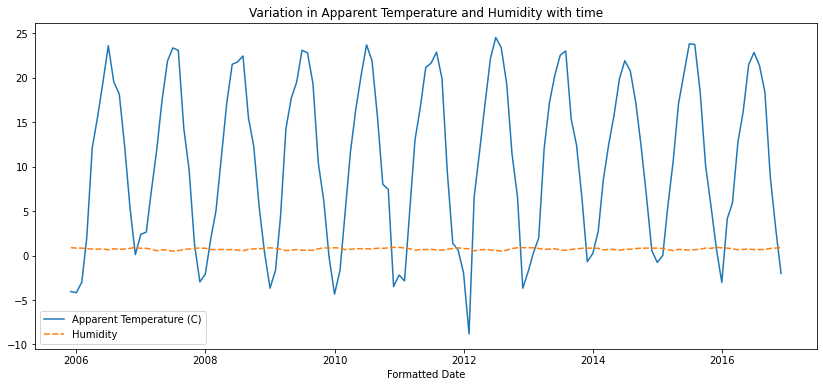

In [11]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(14,6))
plt.title("Variation in Apparent Temperature and Humidity with time")
sns.lineplot(data=df_monthly_mean);

As we can see, both the peaks and the troughs are almost same throughout the period of 10 years. Here is a plot of the average temperature and humidity of the month of April over 10 years.

In [13]:
df_monthly_mean_4 = df_monthly_mean[df_monthly_mean.index.month==4]
df_monthly_mean_4.index = df_monthly_mean_4.index.year

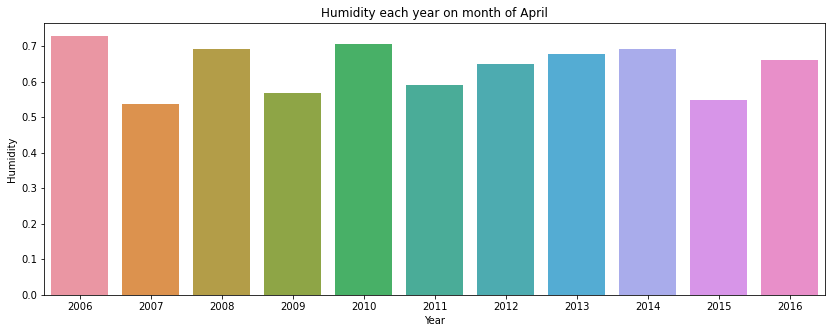

In [14]:
plt.figure(figsize=(14,5))
sns.barplot(x=df_monthly_mean_4.index, y='Humidity', data=df_monthly_mean_4)
plt.xlabel("Year")
plt.title('Humidity each year on month of April')
plt.show()

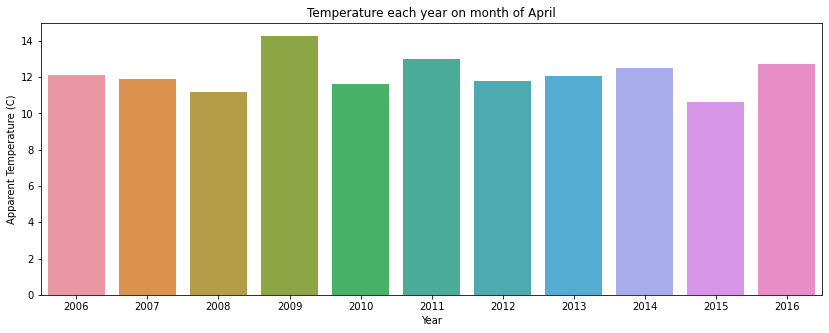

In [15]:
plt.figure(figsize=(14,5))
sns.barplot(x=df_monthly_mean_4.index, y='Apparent Temperature (C)', data=df_monthly_mean_4)
plt.xlabel("Year")
plt.title('Temperature each year on month of April')
plt.show()

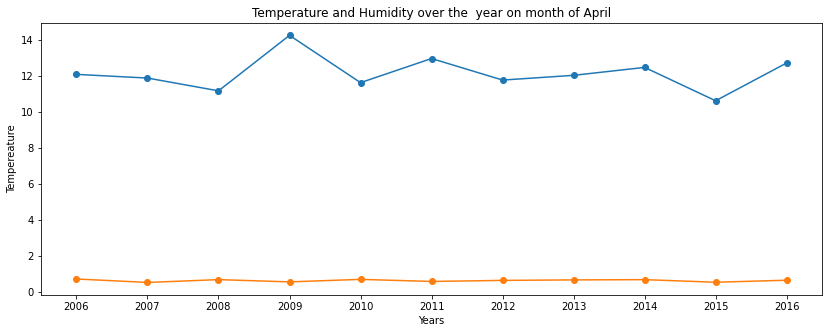

In [16]:
plt.figure(figsize=(14,5))
plt.plot(df_monthly_mean_4, 'o-')
plt.xticks(df_monthly_mean_4.index)
plt.xlabel("Years")
plt.ylabel('Tempereature')
plt.title('Temperature and Humidity over the  year on month of April')
plt.show()

# Some Important Question on Weather data

In [16]:
df.nunique()

Summary                       27
Precip Type                    2
Temperature (C)             7574
Apparent Temperature (C)    8984
Humidity                      90
Wind Speed (km/h)           2484
Wind Bearing (degrees)       360
Visibility (km)              949
Loud Cover                     1
Pressure (millibars)        4979
Daily Summary                214
dtype: int64

In [17]:
df.count()

Summary                     96453
Precip Type                 95936
Temperature (C)             96453
Apparent Temperature (C)    96453
Humidity                    96453
Wind Speed (km/h)           96453
Wind Bearing (degrees)      96453
Visibility (km)             96453
Loud Cover                  96453
Pressure (millibars)        96453
Daily Summary               96453
dtype: int64

In [18]:
df['Summary'].value_counts()

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Windy and Mostly Cloudy                   35
Breezy and Foggy                          35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96453 entries, 2006-03-31 22:00:00+00:00 to 2016-09-09 21:00:00+00:00
Data columns (total 11 columns):
Summary                     96453 non-null object
Precip Type                 95936 non-null object
Temperature (C)             96453 non-null float64
Apparent Temperature (C)    96453 non-null float64
Humidity                    96453 non-null float64
Wind Speed (km/h)           96453 non-null float64
Wind Bearing (degrees)      96453 non-null float64
Visibility (km)             96453 non-null float64
Loud Cover                  96453 non-null float64
Pressure (millibars)        96453 non-null float64
Daily Summary               96453 non-null object
dtypes: float64(8), object(3)
memory usage: 8.8+ MB


## Q1. Find all the unique 'Wind Speed' values in the data

In [20]:
df.head(2)

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.


In [21]:
df.nunique()

Summary                       27
Precip Type                    2
Temperature (C)             7574
Apparent Temperature (C)    8984
Humidity                      90
Wind Speed (km/h)           2484
Wind Bearing (degrees)       360
Visibility (km)              949
Loud Cover                     1
Pressure (millibars)        4979
Daily Summary                214
dtype: int64

In [22]:
df['Wind Speed (km/h)'].nunique()

2484

In [23]:
df['Wind Speed (km/h)'].unique()

array([14.1197, 14.2646,  3.9284, ..., 37.0622, 35.5971, 30.751 ])

## Q2. Find the number of times when the 'Weather is exactly Clear'.

In [24]:
df.head(2)

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.


In [25]:
df.Summary.value_counts()

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Windy and Mostly Cloudy                   35
Breezy and Foggy                          35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [26]:
df[df['Summary'] =='Clear']

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-04-18 05:00:00+00:00,Clear,rain,8.688889,8.688889,0.93,1.4329,290.0,5.8443,0.0,1012.96,Partly cloudy until night.
2006-04-20 19:00:00+00:00,Clear,rain,12.266667,12.266667,0.99,8.0500,320.0,6.1985,0.0,1015.76,Foggy starting overnight continuing until morn...
2006-04-21 23:00:00+00:00,Clear,rain,9.355556,8.633333,0.96,6.4239,321.0,3.3649,0.0,1017.56,Foggy starting overnight continuing until morn...
2006-04-22 00:00:00+00:00,Clear,rain,9.861111,9.861111,0.96,3.2361,319.0,4.4597,0.0,1016.16,Foggy starting overnight continuing until morn...
2006-04-22 19:00:00+00:00,Clear,rain,12.494444,12.494444,0.91,3.9445,197.0,9.9820,0.0,1015.51,Foggy starting overnight continuing until morn...
2006-04-22 20:00:00+00:00,Clear,rain,12.244444,12.244444,0.89,1.5295,140.0,15.8263,0.0,1015.72,Foggy starting overnight continuing until morn...
2006-04-22 21:00:00+00:00,Clear,rain,11.416667,11.416667,0.92,2.9624,275.0,14.9569,0.0,1015.79,Foggy starting overnight continuing until morn...
2006-04-22 22:00:00+00:00,Clear,rain,10.555556,10.555556,0.95,6.0375,290.0,14.8120,0.0,1015.83,Foggy in the morning.
2006-04-22 23:00:00+00:00,Clear,rain,10.466667,10.466667,0.93,3.0751,270.0,9.8049,0.0,1015.95,Foggy in the morning.


In [27]:
df.groupby('Summary').get_group('Clear')

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-04-18 05:00:00+00:00,Clear,rain,8.688889,8.688889,0.93,1.4329,290.0,5.8443,0.0,1012.96,Partly cloudy until night.
2006-04-20 19:00:00+00:00,Clear,rain,12.266667,12.266667,0.99,8.0500,320.0,6.1985,0.0,1015.76,Foggy starting overnight continuing until morn...
2006-04-21 23:00:00+00:00,Clear,rain,9.355556,8.633333,0.96,6.4239,321.0,3.3649,0.0,1017.56,Foggy starting overnight continuing until morn...
2006-04-22 00:00:00+00:00,Clear,rain,9.861111,9.861111,0.96,3.2361,319.0,4.4597,0.0,1016.16,Foggy starting overnight continuing until morn...
2006-04-22 19:00:00+00:00,Clear,rain,12.494444,12.494444,0.91,3.9445,197.0,9.9820,0.0,1015.51,Foggy starting overnight continuing until morn...
2006-04-22 20:00:00+00:00,Clear,rain,12.244444,12.244444,0.89,1.5295,140.0,15.8263,0.0,1015.72,Foggy starting overnight continuing until morn...
2006-04-22 21:00:00+00:00,Clear,rain,11.416667,11.416667,0.92,2.9624,275.0,14.9569,0.0,1015.79,Foggy starting overnight continuing until morn...
2006-04-22 22:00:00+00:00,Clear,rain,10.555556,10.555556,0.95,6.0375,290.0,14.8120,0.0,1015.83,Foggy in the morning.
2006-04-22 23:00:00+00:00,Clear,rain,10.466667,10.466667,0.93,3.0751,270.0,9.8049,0.0,1015.95,Foggy in the morning.


## Q3. Find the number of times when the 'Wind Speed was exactly 4 km/h'.

In [28]:
df[df['Wind Speed (km/h)']==4]

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,


## Q4.Find out all the Null Values in the data.

In [29]:
df.isnull().sum()

Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [30]:
df.notnull().sum()

Summary                     96453
Precip Type                 95936
Temperature (C)             96453
Apparent Temperature (C)    96453
Humidity                    96453
Wind Speed (km/h)           96453
Wind Bearing (degrees)      96453
Visibility (km)             96453
Loud Cover                  96453
Pressure (millibars)        96453
Daily Summary               96453
dtype: int64

## Q5. Rename the column name 'Summary' of the dataframe to 'WeatherCondition'.

In [31]:
df.rename(columns = {'Summary': 'Weather Condition'}, inplace=True)

In [32]:
df.head(2)

,Weather Condition,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.


## Q6. What is the mean 'Visibility'?

In [33]:
df['Visibility (km)'].mean()

10.347324929240148

## Q7.What is the Standard Deviation of "Pressure"in this data?

In [34]:
df['Pressure (millibars)'].std()

116.96990568258018

## Q8. What is the variance of 'Humidity' in this data.

In [35]:
df['Humidity'].var()

0.03820959171843968

## Q9. Find all instances when 'Snow' was recorded

In [36]:
df['Weather Condition'].value_counts()

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Windy and Mostly Cloudy                   35
Breezy and Foggy                          35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [37]:
df[df['Weather Condition']=='snow']

,Weather Condition,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,


In [38]:
df['Weather Condition'].str.contains('snow').sum()

0

## Q10. Find all instances when 'Wind Speed is above 24' and 'Visbility is 25'

In [39]:
(df['Wind Speed (km/h)'] > 51).sum()

9

In [40]:
(df['Visibility (km)'] == 3.3649).sum()

82

In [41]:
df[(df['Wind Speed (km/h)'] > 21) & (df['Visibility (km)'] == 3.3649)]

,Weather Condition,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2010-12-13 08:00:00+00:00,Overcast,snow,0.000000,-5.750000,0.85,23.8602,300.0,3.3649,0.0,0.00,Mostly cloudy starting in the morning.
2011-01-22 05:00:00+00:00,Overcast,snow,-1.111111,-7.088889,0.91,23.2323,11.0,3.3649,0.0,1025.19,Mostly cloudy throughout the day.
2013-11-25 02:00:00+00:00,Overcast,rain,5.972222,1.461111,0.93,28.5936,311.0,3.3649,0.0,1003.93,Overcast throughout the day and breezy in the ...
2016-02-24 02:00:00+00:00,Breezy and Overcast,rain,7.105556,2.461111,0.86,34.8404,320.0,3.3649,0.0,1009.19,Mostly cloudy throughout the day and breezy st...


## Q11. What is the mean value of each column against each'Weather Condition'?

In [42]:
df.groupby('Weather Condition').mean()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Weather Condition,,,,,,,,
Breezy,7.922016,3.387654,0.637778,32.143948,233.018519,9.577115,0.0,563.917593
Breezy and Dry,21.111111,21.111111,0.260000,33.810000,240.000000,9.982000,0.0,1021.600000
Breezy and Foggy,-0.510317,-7.403492,0.938571,33.477880,160.628571,1.621960,0.0,1008.934000
Breezy and Mostly Cloudy,11.093411,8.680588,0.637054,33.386345,227.639535,11.478302,0.0,1000.622984
Breezy and Overcast,7.241614,3.492235,0.763144,33.037566,213.526515,11.067012,0.0,1002.114924
Breezy and Partly Cloudy,12.492761,9.989349,0.545803,33.532796,259.282383,11.326058,0.0,996.398212
Clear,11.925109,11.040338,0.729708,8.141352,179.180257,11.441788,0.0,951.763532
Dangerously Windy and Partly Cloudy,8.944444,3.483333,0.490000,63.852600,307.000000,11.447100,0.0,1009.050000
Drizzle,10.847578,10.011681,0.867949,10.356428,177.307692,8.069815,0.0,1014.931538


## Q12. What is the Minimum & maximum value of each column against each 'Weather Condition'

In [43]:
df.groupby('Weather Condition').min()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Weather Condition,,,,,,,,,
Breezy,-2.777778,-10.411111,0.18,28.9800,0.0,0.0000,0.0,0.00,Breezy and mostly cloudy overnight.
Breezy and Dry,21.111111,21.111111,0.26,33.8100,240.0,9.9820,0.0,1021.60,Partly cloudy starting in the afternoon.
Breezy and Foggy,-3.827778,-11.905556,0.83,29.1571,0.0,0.3542,0.0,989.47,Breezy and foggy starting in the evening.
Breezy and Mostly Cloudy,-6.966667,-15.972222,0.15,28.9800,0.0,4.7817,0.0,0.00,Breezy and foggy starting in the evening.
Breezy and Overcast,-11.533333,-21.716667,0.15,28.9800,0.0,3.3488,0.0,0.00,Breezy and foggy starting in the evening.
Breezy and Partly Cloudy,-5.050000,-13.416667,0.17,28.9800,10.0,5.5384,0.0,0.00,Breezy and mostly cloudy overnight.
Clear,-20.000000,-27.716667,0.00,0.0000,0.0,0.0000,0.0,0.00,Breezy and foggy until morning.
Dangerously Windy and Partly Cloudy,8.944444,3.483333,0.49,63.8526,307.0,11.4471,0.0,1009.05,Mostly cloudy throughout the day and windy sta...
Drizzle,7.805556,4.938889,0.58,1.7388,5.0,0.0000,0.0,994.50,Drizzle starting in the evening.


In [44]:
df.groupby('Weather Condition').max()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Weather Condition,,,,,,,,,
Breezy,37.588889,35.700000,0.82,38.2697,350.0,16.1000,0.0,1030.19,Windy in the afternoon.
Breezy and Dry,21.111111,21.111111,0.26,33.8100,240.0,9.9820,0.0,1021.60,Partly cloudy starting in the afternoon.
Breezy and Foggy,17.616667,17.616667,1.00,38.0765,351.0,2.5277,0.0,1015.85,Partly cloudy until night.
Breezy and Mostly Cloudy,27.522222,27.766667,0.93,40.1373,350.0,16.1000,0.0,1037.14,Partly cloudy until night.
Breezy and Overcast,22.433333,22.433333,1.00,40.1212,359.0,16.1000,0.0,1034.98,Partly cloudy until night and breezy starting ...
Breezy and Partly Cloudy,38.438889,36.922222,0.93,40.1373,350.0,16.1000,0.0,1041.25,Partly cloudy until night.
Clear,39.905556,38.661111,1.00,29.7850,359.0,16.1000,0.0,1046.38,Windy in the afternoon.
Dangerously Windy and Partly Cloudy,8.944444,3.483333,0.49,63.8526,307.0,11.4471,0.0,1009.05,Mostly cloudy throughout the day and windy sta...
Drizzle,17.844444,17.844444,0.94,24.7940,355.0,15.7297,0.0,1022.49,Rain until morning.


## Q13. Show all the Records where Weather condition is 'Rain'

In [45]:
df[df['Weather Condition'] == 'Rain']

,Weather Condition,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2016-10-21 21:00:00+00:00,Rain,rain,9.738889,9.738889,0.96,4.2826,286.0,4.6529,0.0,1014.10,Rain throughout the day.
2016-10-21 22:00:00+00:00,Rain,rain,9.288889,8.244444,0.95,7.7280,314.0,4.4919,0.0,1014.09,Rain until morning.
2016-10-21 23:00:00+00:00,Rain,rain,8.738889,6.994444,0.95,10.8192,316.0,3.1395,0.0,1014.12,Rain until morning.
2016-10-22 00:00:00+00:00,Rain,rain,8.205556,6.105556,0.95,12.2843,314.0,5.5062,0.0,1014.19,Rain until morning.
2016-10-26 02:00:00+00:00,Rain,rain,10.844444,10.844444,0.93,7.3899,150.0,0.0000,0.0,1019.30,Rain until afternoon.
2016-10-26 03:00:00+00:00,Rain,rain,10.561111,10.561111,0.94,5.2647,146.0,0.0000,0.0,1019.04,Rain until afternoon.
2016-10-26 04:00:00+00:00,Rain,rain,10.488889,10.488889,0.95,3.0912,137.0,0.0000,0.0,1019.06,Rain until afternoon.
2016-10-26 05:00:00+00:00,Rain,rain,10.633333,10.633333,0.95,0.9821,99.0,0.0000,0.0,1019.32,Rain until afternoon.
2016-10-26 06:00:00+00:00,Rain,rain,10.961111,10.961111,0.95,1.9320,355.0,0.0000,0.0,1019.72,Rain until afternoon.


## Q14. Find all instances when 'Weather is Clear' or 'Visibility is above 20'

In [46]:
df[(df['Weather Condition']=='Clear') | (df['Visibility (km)']> 20)]

,Weather Condition,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-04-18 05:00:00+00:00,Clear,rain,8.688889,8.688889,0.93,1.4329,290.0,5.8443,0.0,1012.96,Partly cloudy until night.
2006-04-20 19:00:00+00:00,Clear,rain,12.266667,12.266667,0.99,8.0500,320.0,6.1985,0.0,1015.76,Foggy starting overnight continuing until morn...
2006-04-21 23:00:00+00:00,Clear,rain,9.355556,8.633333,0.96,6.4239,321.0,3.3649,0.0,1017.56,Foggy starting overnight continuing until morn...
2006-04-22 00:00:00+00:00,Clear,rain,9.861111,9.861111,0.96,3.2361,319.0,4.4597,0.0,1016.16,Foggy starting overnight continuing until morn...
2006-04-22 19:00:00+00:00,Clear,rain,12.494444,12.494444,0.91,3.9445,197.0,9.9820,0.0,1015.51,Foggy starting overnight continuing until morn...
2006-04-22 20:00:00+00:00,Clear,rain,12.244444,12.244444,0.89,1.5295,140.0,15.8263,0.0,1015.72,Foggy starting overnight continuing until morn...
2006-04-22 21:00:00+00:00,Clear,rain,11.416667,11.416667,0.92,2.9624,275.0,14.9569,0.0,1015.79,Foggy starting overnight continuing until morn...
2006-04-22 22:00:00+00:00,Clear,rain,10.555556,10.555556,0.95,6.0375,290.0,14.8120,0.0,1015.83,Foggy in the morning.
2006-04-22 23:00:00+00:00,Clear,rain,10.466667,10.466667,0.93,3.0751,270.0,9.8049,0.0,1015.95,Foggy in the morning.


## Q15.Find the all instances when:

A. 'Weather is Clear' and 'Humidity is greater than 50'
or
B. 'Visibility is above 40'

In [47]:
df[(df['Weather Condition']=='Clear') & (df['Humidity'] > 10) | (df['Visibility (km)']>40)]

,Weather Condition,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
